## Some Questions that i answered through statistical analysis on the data

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('Train.csv')
# df = pd.read_csv('/kaggle/input/customer-analytics/Train.csv')
df.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [3]:
df.shape

(10999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

#### No null  values

In [7]:
numerical_columns = df.dtypes[df.dtypes != 'object']

In [9]:
categorical_columns = df.dtypes[df.dtypes == 'object']

## EDA

<AxesSubplot:>

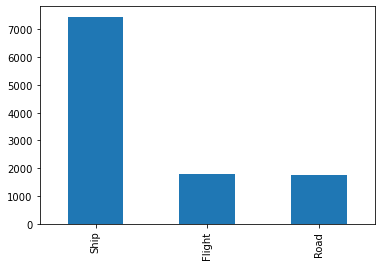

In [14]:
df['Mode_of_Shipment'].value_counts().plot(kind = 'bar')

Observation:

Flights and Road have equal number but ships carry way too heavy load which makes sense as they are cargo ships which is cheaper than road or by planes

#### Question: Let's check if the product importance is high that could means its mode of transport is flight maybe?

In [26]:
#df['Product_importance'].value_counts()

<AxesSubplot:xlabel='Product_importance,Mode_of_Shipment'>

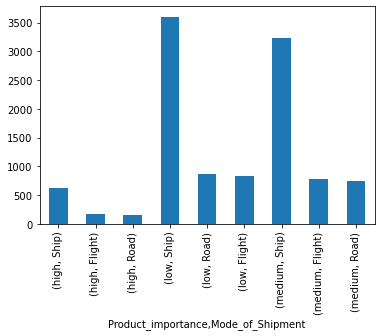

In [24]:
df.groupby(by = 'Product_importance')['Mode_of_Shipment'].value_counts().plot(kind = 'bar')

No distribution is almost same in all categories that means product importance has no role in mode of transport

#### lets check some relation with warehouse block

<AxesSubplot:ylabel='Warehouse_block'>

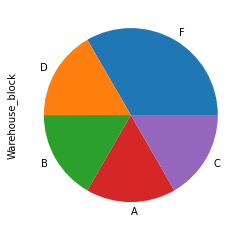

In [30]:
df['Warehouse_block'].value_counts().plot(kind = 'pie')

Clearly F block has the highest storage and rest all four of them are equal in storage

<AxesSubplot:xlabel='Warehouse_block,Product_importance'>

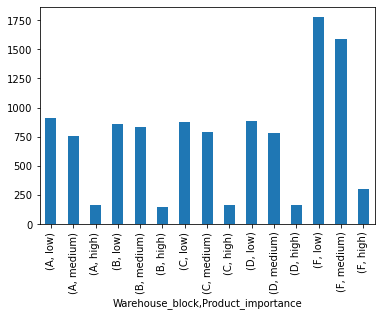

In [35]:
df.groupby(by = 'Warehouse_block')['Product_importance'].value_counts().plot(kind = 'bar')

Again the distribution is same among all warehouses thus no relationship between product importance and warehouse block

<AxesSubplot:xlabel='Warehouse_block,Mode_of_Shipment'>

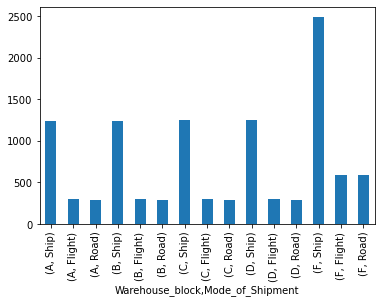

In [36]:
df.groupby(by = 'Warehouse_block')['Mode_of_Shipment'].value_counts().plot(kind = 'bar')

No relation between mode of shipment and warehouse block where products are stored